In [ ]:
#Name:-T.Sunith kumar
#Reg No:-21BCE9496
#Branch:-C.S.E(A.I&M.L)

In [88]:
# Steps:
# 1.import the libraries
# 2.import the dataset
# 3.Checking for null values
# 4.Data Visualisation
# 5.outlier detection
# 6.Splitting dependent and Independent variables
# 7.perform encoding
# 8.splitting into train and test set
# 9.feature scaling

###1)Importing the necessary libraries


In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###2)Importing the Dataset


In [90]:
dataset=pd.read_csv("Titanic-Dataset.csv")

In [112]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [113]:
dataset.head()  #-->returns frst five records of the dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [114]:
dataset.tail()  #-->returns last five records of the dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.000000,0,0,13.00,S
887,888,1,1,female,19.000000,0,0,30.00,S
888,889,0,3,female,29.699118,1,2,23.45,S
889,890,1,1,male,26.000000,0,0,30.00,C
890,891,0,3,male,32.000000,0,0,7.75,Q


In [115]:
dataset.shape

(891, 9)

In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [117]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
corr=dataset.corr()
corr

<ipython-input-118-f22ca9e9dc13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

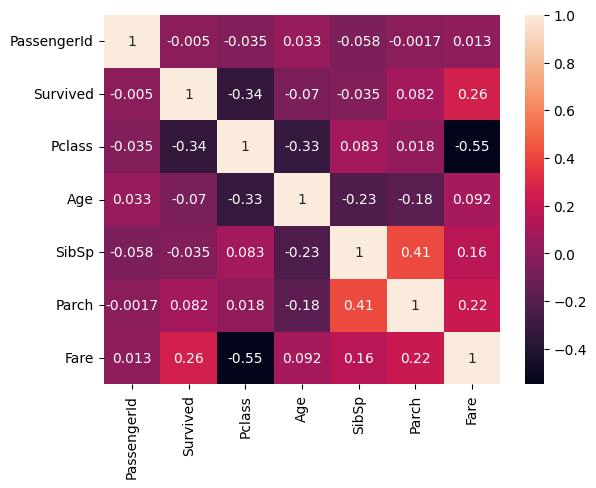

In [119]:
sns.heatmap(corr,annot=True)

In [120]:
dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [121]:
dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

###3)Checking for null values

In [124]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [125]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [131]:
#Numerical variable
dataset["Age"].fillna(dataset["Age"].mean(),inplace=True)

In [132]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [133]:
dataset["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [137]:
#Categorical variable
dataset["Embarked"].fillna(dataset["Embarked"].mode()[0],inplace=True)

In [ ]:
dataset.drop(['Cabin'],axis=1,inplace=True)

dataset.drop(['Ticket'],axis=1,inplace=True)

dataset.drop(['Name'],axis=1,inplace=True)

In [138]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [109]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

###4)Data Visualization

<Axes: xlabel='Embarked', ylabel='Survived'>

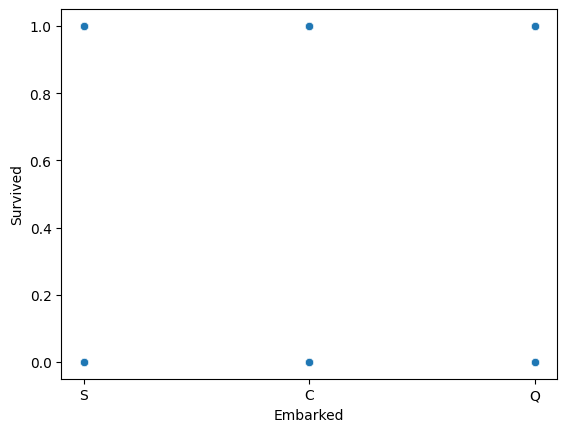

In [140]:
#scatterplot
sns.scatterplot(x="Embarked",y="Survived",data=dataset)
#Inference:From the plot we can say that more no.of people are survived when having a diff embarked

<Axes: xlabel='Embarked', ylabel='Survived'>

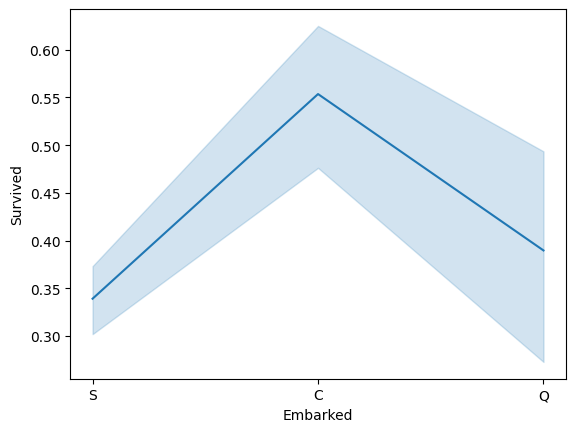

In [142]:
#Lineplot
sns.lineplot(x="Embarked",y="Survived",data=dataset)
#Inference:From the plot we can say that more no.of people are survived is increasing upto a point amd then decreasing

<ipython-input-143-cc5181600c05>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Survived"])


<Axes: xlabel='Survived', ylabel='Density'>

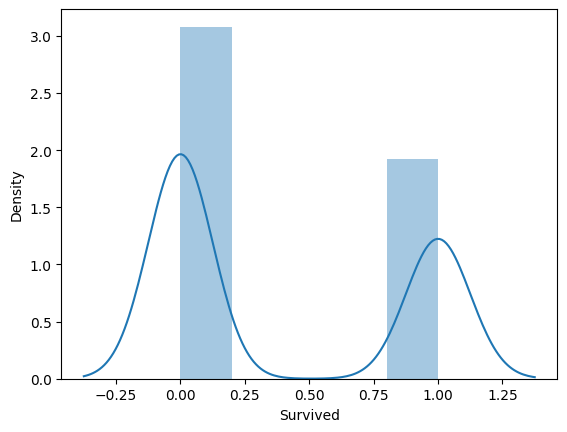

In [143]:
#Distribution plot
sns.distplot(dataset["Survived"])
#Inference:From the given plot we can say that survived density is increasing upto 3 and high at points between 0 & 0.25,then decreasing from 0.5

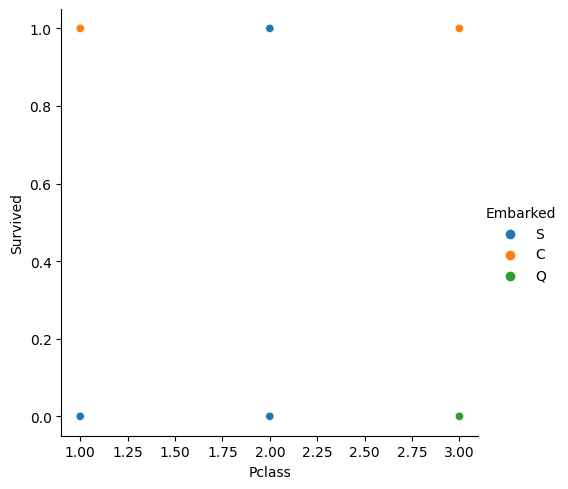

In [145]:
#Relational plot
sns.relplot(x="Pclass",y="Survived",data=dataset,hue="Embarked")
#Inference:From the plot we can say that survived is increasing when survived is same for specific Embarked

<ipython-input-147-71e280ac1783>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Embarked",y="Survived",data=dataset,ci=None)


<Axes: xlabel='Embarked', ylabel='Survived'>

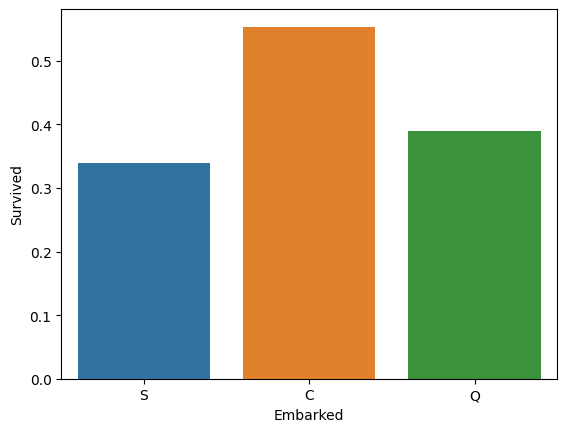

In [147]:
#Barplot
sns.barplot(x="Embarked",y="Survived",data=dataset,ci=None)
#Inference:From the plot we can say that Survival level is altering when embarking is increasing

<Axes: xlabel='Survived', ylabel='count'>

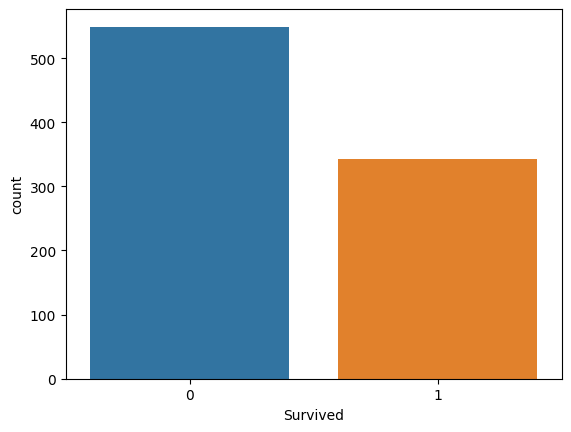

In [148]:
#Countplot
sns.countplot(x="Survived",data=dataset)
#Inference:From the plot we can say that survived is count is less than not survived count

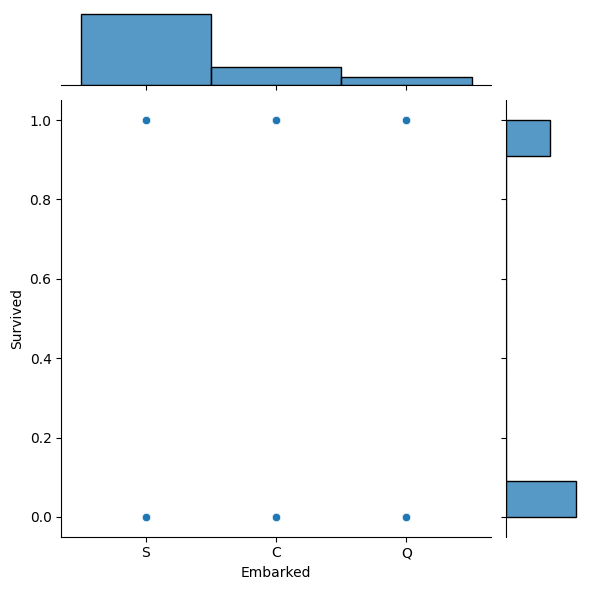

In [149]:
#Jointplot
sns.jointplot(x="Embarked",y="Survived",data=dataset)

<Axes: xlabel='Embarked', ylabel='Survived'>

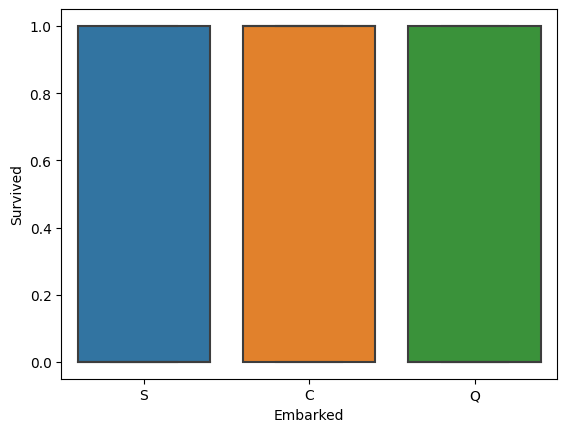

In [150]:
#Boxplot
sns.boxplot(x="Embarked",y="Survived",data=dataset)

###5)Outlier detection

In [153]:
z_scores=np.abs(stats.zscore(dataset['Age']))
max_threshold=3
outliers=dataset['Age'][z_scores >max_threshold]

In [154]:
outliers

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [158]:
z_scores=np.abs(stats.zscore(dataset['Fare']))
max_threshold=3
outliers1=dataset['Fare'][z_scores >max_threshold]

In [159]:
outliers1

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64

In [160]:
column_name='Fare'
#calculating the first quartile(Q1) and third quartile(Q3)
Q1=dataset[column_name].quantile(0.25)
Q3=dataset[column_name].quantile(0.75)

In [161]:
#Calculating IQR
IQR=Q3-Q1

In [162]:
#Define lower and upper bounds for outliers
lower_bound=Q1-1.5*IQR
higher_bound=Q1+1.5*IQR

In [166]:
#filter rows with values outside the IQR bounds
dataset_cleaned=dataset[(dataset[column_name]>lower_bound)&(dataset[column_name]<higher_bound)]

In [167]:
#siz of the cleaned dataframe
dataset_cleaned.shape

(720, 9)

In [168]:
dataset_cleaned

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
2,3,1,3,female,26.000000,0,0,7.9250,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
7,8,0,3,male,2.000000,3,1,21.0750,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


<Axes: >

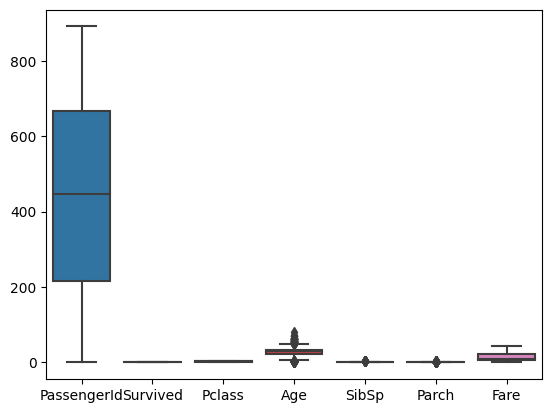

In [169]:
sns.boxplot(dataset_cleaned)

In [170]:
dataset=dataset_cleaned

###6)Splitting Dependent and Independent variables

In [171]:
#Input(Independent variables)
x=dataset.drop('Survived', axis=1)

In [172]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
2,3,3,female,26.000000,0,0,7.9250,S
4,5,3,male,35.000000,0,0,8.0500,S
5,6,3,male,29.699118,0,0,8.4583,Q
7,8,3,male,2.000000,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,S
887,888,1,female,19.000000,0,0,30.0000,S
888,889,3,female,29.699118,1,2,23.4500,S
889,890,1,male,26.000000,0,0,30.0000,C


In [175]:
#Output(Dependent variables)
y=dataset.iloc[:,1:2]

In [176]:
y

,Survived
0,0
2,1
4,0
5,0
7,0
...,...
886,0
887,1
888,0
889,1


###7)Perform Encoding

In [177]:
#Label encoding-->as there are only 2 categories in Sex
from sklearn.preprocessing import LabelEncoder

In [178]:
#Creating object for label encoder
le=LabelEncoder()

In [179]:
x["Sex"]=le.fit_transform(x["Sex"])

In [180]:
x["Sex"]

0      1
2      0
4      1
5      1
7      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 720, dtype: int64

In [182]:
#One hot Encoding--->As there are 3 categories in Embarked
embarked=pd.get_dummies(x["Embarked"],drop_first=True)

In [183]:
x=pd.concat([x,embarked],axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,1,3,1,22.000000,1,0,7.2500,S,0,1
2,3,3,0,26.000000,0,0,7.9250,S,0,1
4,5,3,1,35.000000,0,0,8.0500,S,0,1
5,6,3,1,29.699118,0,0,8.4583,Q,1,0
7,8,3,1,2.000000,3,1,21.0750,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,S,0,1
887,888,1,0,19.000000,0,0,30.0000,S,0,1
888,889,3,0,29.699118,1,2,23.4500,S,0,1
889,890,1,1,26.000000,0,0,30.0000,C,0,0


In [184]:
x.drop(["Embarked"],axis=1,inplace=True)

In [185]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,3,1,22.000000,1,0,7.2500,0,1
2,3,3,0,26.000000,0,0,7.9250,0,1
4,5,3,1,35.000000,0,0,8.0500,0,1
5,6,3,1,29.699118,0,0,8.4583,1,0
7,8,3,1,2.000000,3,1,21.0750,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0,1
887,888,1,0,19.000000,0,0,30.0000,0,1
888,889,3,0,29.699118,1,2,23.4500,0,1
889,890,1,1,26.000000,0,0,30.0000,0,0


In [186]:
x.shape

(720, 9)

###8)Splitting of train and test data

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)   #30% for testing and 70% for training

In [193]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((504, 9), (216, 9), (504, 1), (216, 1))

###9)Feature scaling

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
#cfreating object for standard scaler
sc=StandardScaler()

In [194]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [195]:
x_train

array([[ 0.85201192,  0.66919309,  0.63553105, ..., -0.7617301 ,
        -0.33186166,  0.55901699],
       [-0.95525407,  0.66919309, -1.57348723, ..., -0.75335914,
        -0.33186166,  0.55901699],
       [-0.01167098, -0.84324331, -1.57348723, ...,  1.190965  ,
        -0.33186166,  0.55901699],
       ...,
       [ 1.29717007,  0.66919309,  0.63553105, ..., -0.83835819,
        -0.33186166,  0.55901699],
       [ 0.95854549, -0.84324331,  0.63553105, ..., -0.15663243,
        -0.33186166,  0.55901699],
       [ 1.54828492,  0.66919309,  0.63553105, ...,  1.72207693,
        -0.33186166,  0.55901699]])

In [196]:
x_test

array([[ 0.69329261,  0.66173934,  0.75180941, ...,  0.05612845,
        -0.3617873 , -1.63126238],
       [ 1.41451469,  0.66173934,  0.75180941, ..., -0.72125333,
        -0.3617873 , -1.63126238],
       [-0.6096887 , -2.25531573,  0.75180941, ...,  1.34503282,
        -0.3617873 , -1.63126238],
       ...,
       [ 0.63352283, -2.25531573,  0.75180941, ...,  1.64406389,
        -0.3617873 ,  0.61302217],
       [-0.47819518,  0.66173934, -1.33012434, ...,  0.57079285,
        -0.3617873 ,  0.61302217],
       [ 0.49804465,  0.66173934, -1.33012434, ..., -0.80374726,
         2.76405499, -1.63126238]])

#Done by T.Sunith Kumar,21BCE9496